<h1>Code Block 1</h1>

In [3]:
# Import NumPy
import numpy as np

# Get the random data, first setting a random seed for reproducibility
np.random.seed(100)
n = 50  # Number of points
X = np.linspace(0, 10, n)  # Generate n points between 0 and 10 for X 
epsilon = np.random.uniform(-5, 3, size=(n, ))  # Noise for y coordinates
y = 2 + 3*X + epsilon  # Generate y coordinates

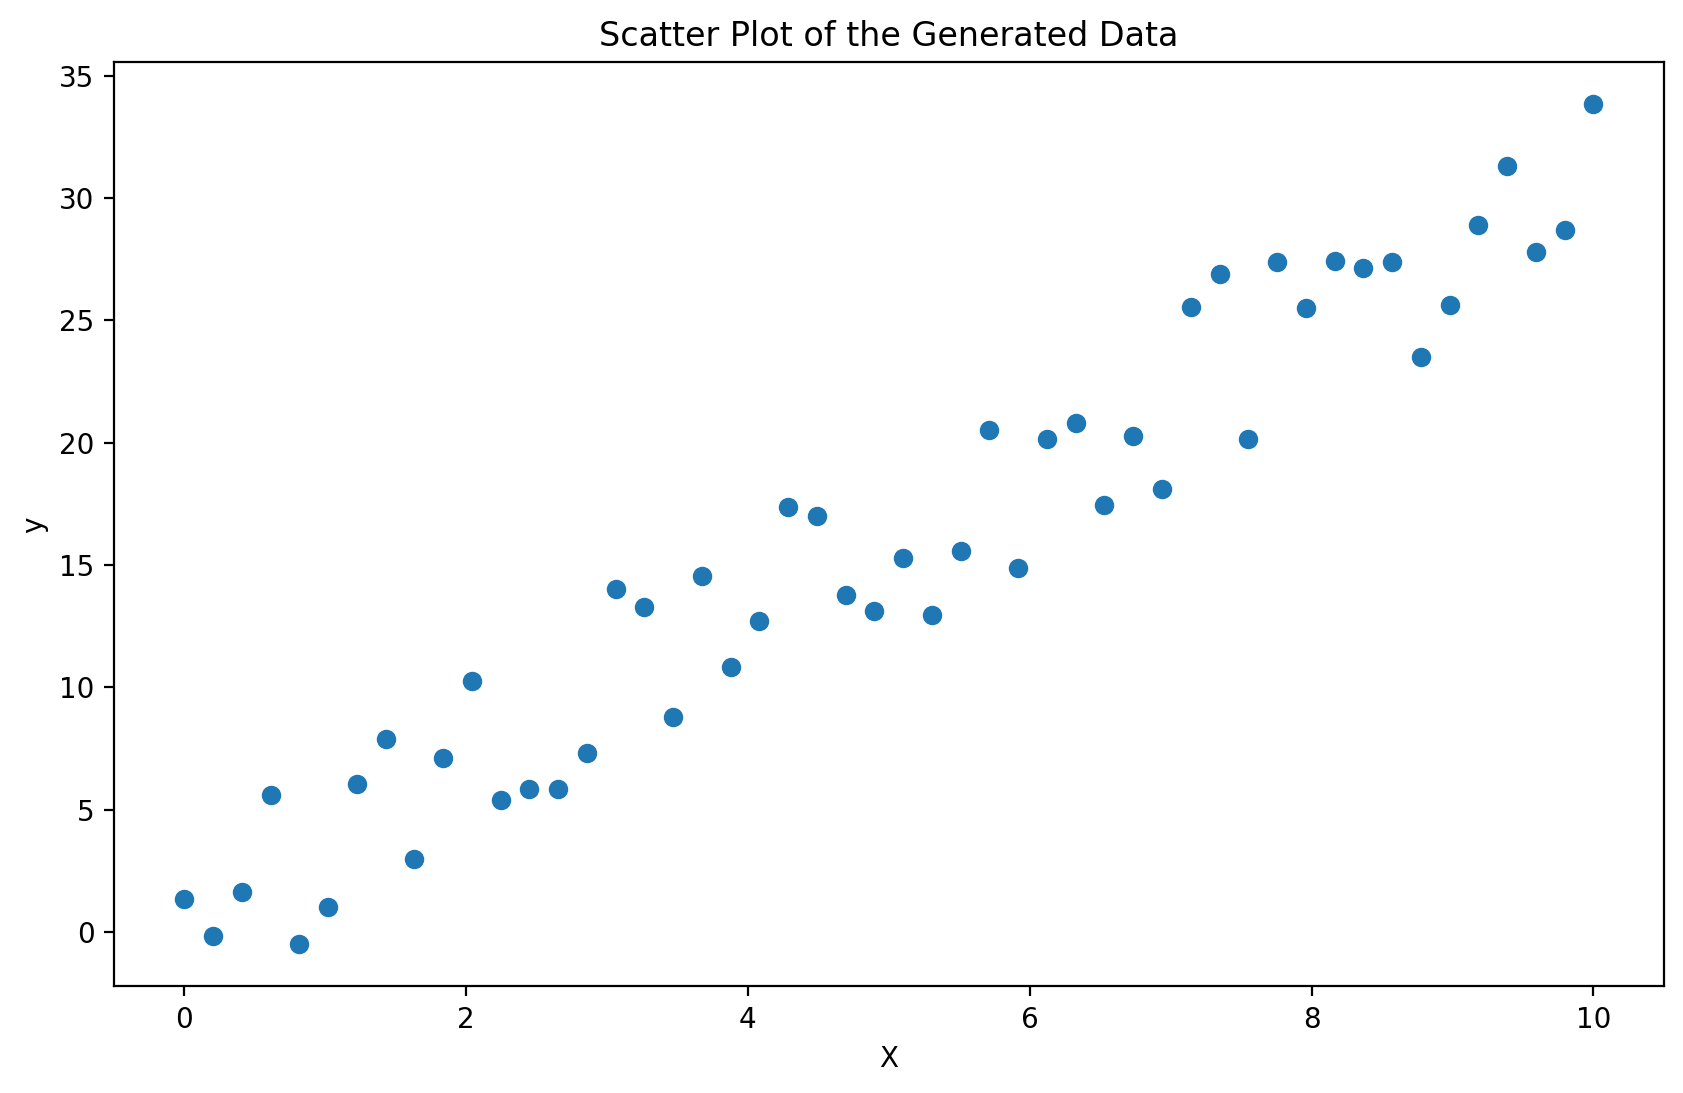

In [5]:
# Plot the points
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of the Generated Data")
plt.savefig("scatter.png")
plt.show()


<h1>Code Block 2</h1>

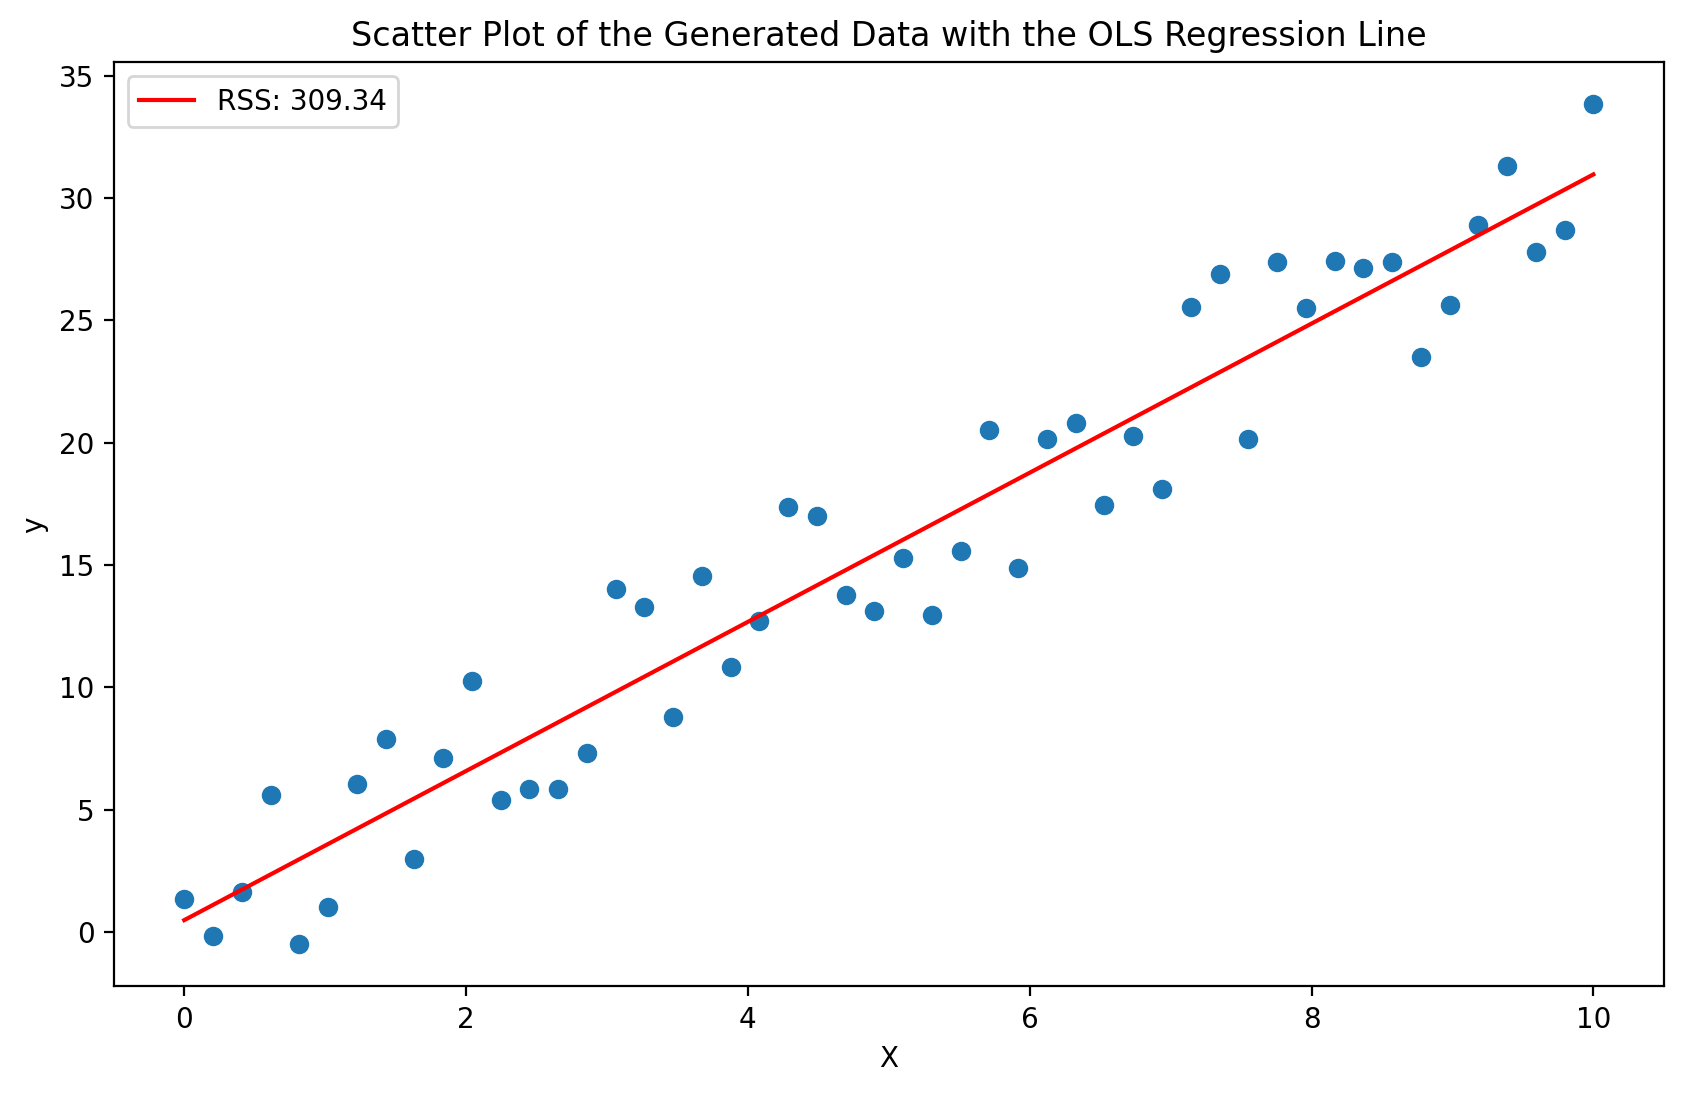

In [14]:
def ols(X, y):
    """
    Perform Ordinary Least Squares (OLS) linear regression.

    Parameters:
    - X (numpy.ndarray): Input feature matrix of shape (n_samples, n_features).
    - y (numpy.ndarray): Target variable vector of shape (n_samples,).

    Returns:
    - numpy.ndarray: Coefficient vector beta, representing the solution to the OLS regression.
    
    This function fits a linear regression model using the Ordinary Least Squares method. It adds a column
    of ones to the input feature matrix X to account for the intercept term (beta_0). The function then
    calculates and returns the coefficient vector beta using the OLS formula: beta = (X^T * X)^(-1) * X^T * y.
    """
    # Add a column of ones to X (account for beta_0)
    X = np.column_stack((np.ones_like(y), X))

    # Return beta's
    return np.linalg.solve(X.T @ X, X.T @ y)

betas = ols(X, y)

# Calculate RSS
rss = np.sum((y - (betas[0] + betas[1]*X))**2)

# Plot the points and the regression line
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(X, y)
plt.plot(X, betas[0] + betas[1]*X, color="red", label=f"RSS: {rss:.2f}")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of the Generated Data with the OLS Regression Line")
plt.savefig("scatter_ols.png")
plt.show()

<h1>Code Block 3</h1>

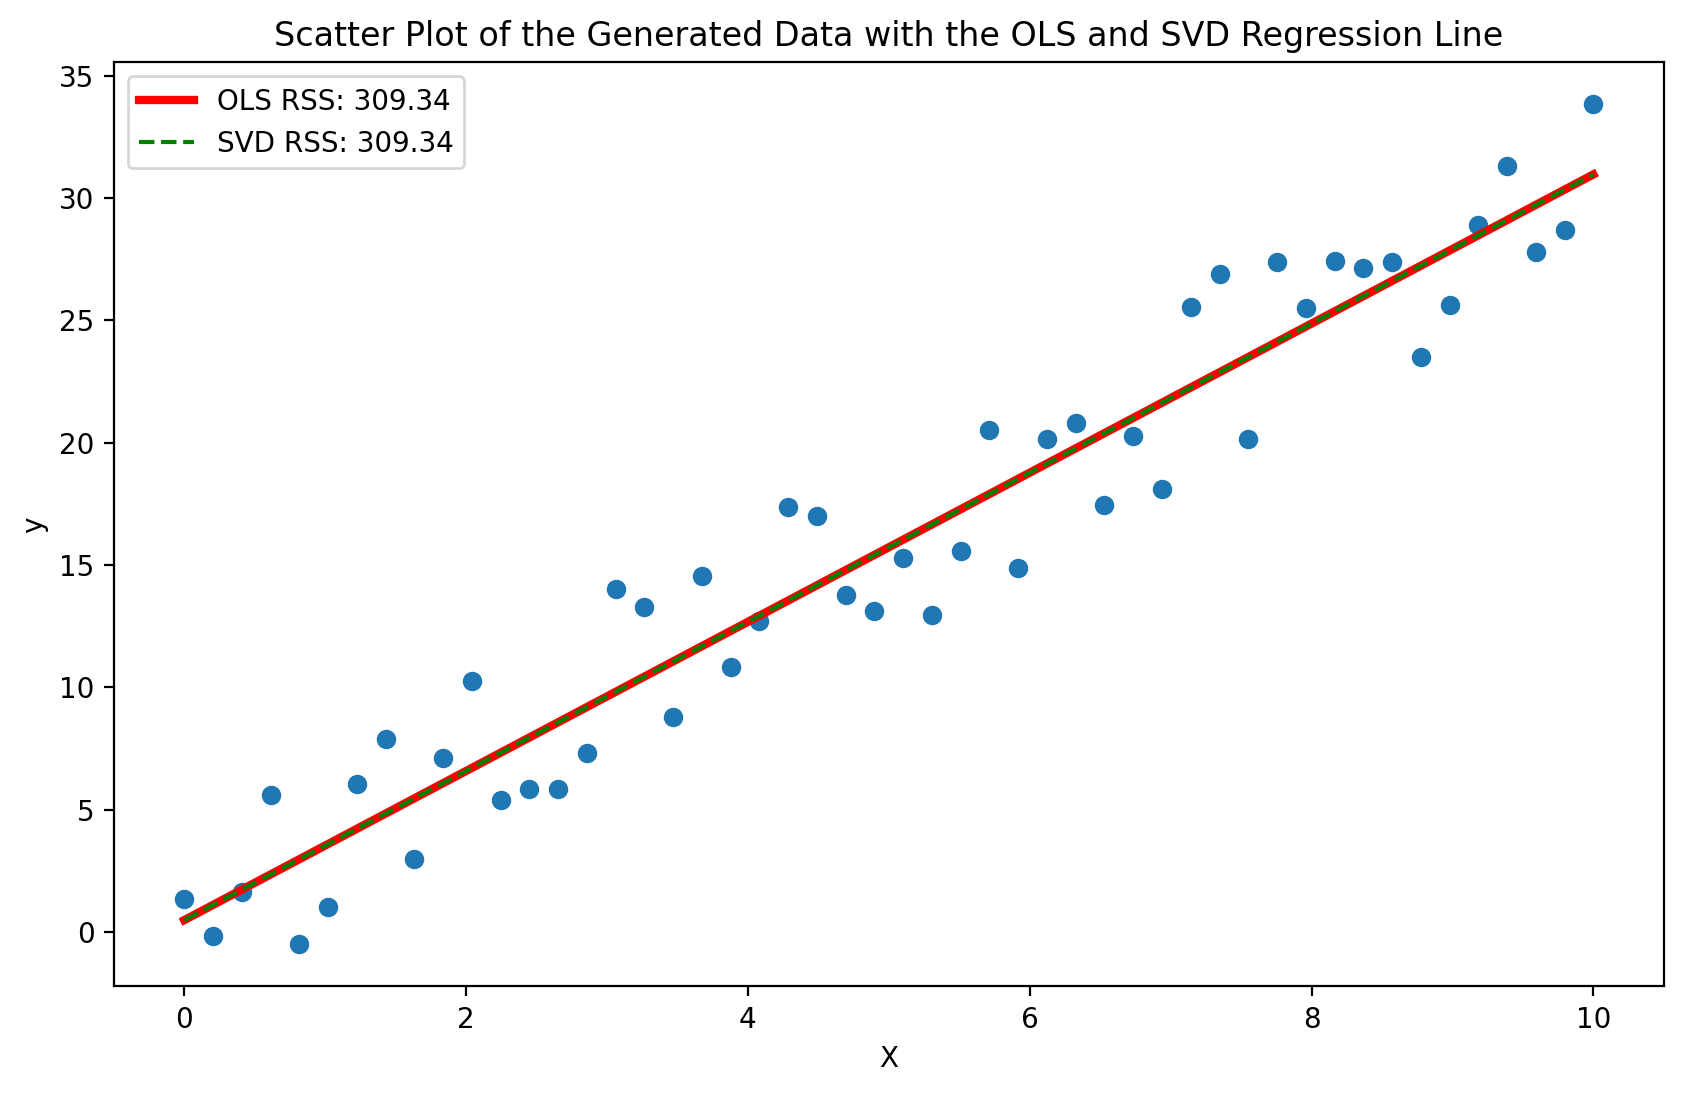

In [22]:
def SVD_OLS(X, y):
    """
    Perform Ordinary Least Squares (OLS) linear regression using Singular Value Decomposition (SVD).

    Parameters:
    - X (numpy.ndarray): Input feature matrix of shape (n_samples, n_features).
    - y (numpy.ndarray): Target variable vector of shape (n_samples,).

    Returns:
    - numpy.ndarray: Coefficient vector beta, representing the solution to the OLS regression.
    
    This function fits a linear regression model using the Ordinary Least Squares method with the help of
    Singular Value Decomposition (SVD). It adds a column of ones to the input feature matrix X to account
    for the intercept term (beta_0). The function then computes the SVD of X (X = U * Sigma * V^T), where U and
    V are orthogonal matrices, and Sigma is a diagonal matrix of singular values. The OLS solution is obtained
    using the SVD components: beta = V * diag(1/s) * U^T * y, where diag(1/s) represents the inverse of the
    diagonal matrix of singular values.
    """
    # Add a column of ones to account for beta_0
    X = np.column_stack((np.ones_like(y), X))

    # Compute SVD of X
    U, s, V = np.linalg.svd(X, full_matrices=False)

    # Return OLS using SVD
    return V.T @ np.diag(1/s) @ U.T @ y

betas_ols = ols(X, y)
betas_svd = SVD_OLS(X, y)

# Calculate RSS
rss_ols = np.sum((y - (betas_ols[0] + betas_ols[1]*X))**2)
rss_svd = np.sum((y - (betas_svd[0] + betas_svd[1]*X))**2)

# Plot the points and the regression line
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(X, y)
plt.plot(X, betas_ols[0] + betas_ols[1]*X, lw=3,color="red", label=f"OLS RSS: {rss_ols:.2f}")
plt.plot(X, betas_ols[0] + betas_ols[1]*X, '--',color="green", label=f"SVD RSS: {rss_svd:.2f}")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of the Generated Data with the OLS and SVD Regression Line")
plt.savefig("scatter_ols_svd.png")
plt.show()